# Import

In [1]:
!pip -q install ./python

In [2]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from unityagents import UnityEnvironment
import numpy as np
from dqn_agent import Agent

In [3]:
BUFFER_SIZE = int(1e5)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.99            # discount factor
TAU = 1e-3              # for soft update of target parameters
LR = 5e-4               # learning rate 
UPDATE_EVERY = 4        # how often to update the network

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Unity environment

In [4]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


# DQN Function

In [5]:
def dqn(agent, n_episodes=4000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.999, train=True):
    """Deep Q-Learning.
    
    Args
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        train (bool): flag deciding if the agent will train or just play through the episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    acceptable = False
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps if train else 0.0)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            if train:
                agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=13.0 and train and acceptable == False:
            print('\nAcceptable score in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn_acceptable.pth')
            acceptable = True
    torch.save(agent.qnetwork_local.state_dict(), 'checkpoint_dqn.pth')
    return scores

# Train

Episode 100	Average Score: 0.17
Episode 200	Average Score: 0.92
Episode 300	Average Score: 1.57
Episode 400	Average Score: 2.11
Episode 500	Average Score: 2.99
Episode 600	Average Score: 4.19
Episode 700	Average Score: 5.34
Episode 800	Average Score: 6.42
Episode 900	Average Score: 6.61
Episode 1000	Average Score: 7.64
Episode 1100	Average Score: 7.95
Episode 1200	Average Score: 8.73
Episode 1300	Average Score: 8.95
Episode 1400	Average Score: 9.51
Episode 1500	Average Score: 9.07
Episode 1600	Average Score: 9.76
Episode 1700	Average Score: 11.01
Episode 1800	Average Score: 11.42
Episode 1900	Average Score: 11.60
Episode 2000	Average Score: 11.58
Episode 2100	Average Score: 11.94
Episode 2200	Average Score: 12.02
Episode 2245	Average Score: 13.01
Acceptable score in 2145 episodes!	Average Score: 13.01
Episode 2300	Average Score: 13.11
Episode 2400	Average Score: 13.94
Episode 2500	Average Score: 13.95
Episode 2600	Average Score: 13.51
Episode 2700	Average Score: 13.05
Episode 2800	Aver

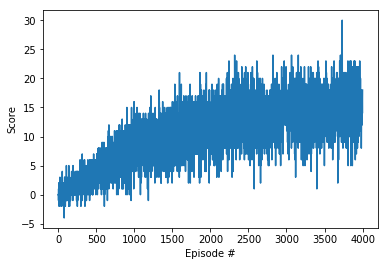

In [6]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
scores = dqn(agent)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

# Run the Trained Agent

In [7]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, filename='checkpoint_dqn.pth')
scores = dqn(agent, n_episodes=100, train=False)

Episode 100	Average Score: 15.01


# Close environment

In [ ]:
env.close()

In [8]:
plt.savefig('training.png')

<Figure size 432x288 with 0 Axes>